# HT7. Support Vector Machine

## Miembros
- Francisco Javier Castillo Cerna 21562
- Fernanda Esquivel de León 21542
- Andrés Estuardo Montoya 21552

## Link al repositorio 
El repositorio puede ser visualizado [acá](https://github.com/FerEsq/DM-House-Saleprice-Predictor/tree/SVM)

# 1. Use los mismos conjuntos de entrenamiento y prueba de las hojas de trabajo pasadas para probar el algoritmo.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv('data/train.csv')

In [53]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [55]:
df["MSZoning"] = le.fit_transform(df["MSZoning"])
df["Street"] = le.fit_transform(df["Street"])
df["Alley"] = le.fit_transform(df["Alley"])
df["LotShape"] = le.fit_transform(df["LotShape"])
df["LandContour"] = le.fit_transform(df["LandContour"])
df["Utilities"] = le.fit_transform(df["Utilities"])
df["LotConfig"] = le.fit_transform(df["LotConfig"])
df["LandSlope"] = df["LandSlope"].map({
    "Gtl": 1,
    "Mod": 2,
    "Sev": 3
})
df["Neighborhood"] = le.fit_transform(df["Neighborhood"])
df["Condition1"] = le.fit_transform(df["Condition1"])
df["Condition2"] = le.fit_transform(df["Condition2"])
df["BldgType"] = le.fit_transform(df["BldgType"])
df["HouseStyle"] = le.fit_transform(df["HouseStyle"])
df["RoofStyle"] = le.fit_transform(df["RoofStyle"])
df["RoofMatl"] = le.fit_transform(df["RoofMatl"])
df["Exterior1st"] = le.fit_transform(df["Exterior1st"])
df["Exterior2nd"] = le.fit_transform(df["Exterior2nd"])
df["MasVnrType"] = le.fit_transform(df["MasVnrType"])

condition_map = {
    "Ex": 5,
    "Gd": 4,
    "TA": 3,
    "Fa": 2,
    "Po": 1,
    "NA": 0,
}
df["ExterQual"] = df["ExterQual"].map(condition_map)
df["ExterCond"] = df["ExterCond"].map(condition_map)
df["Foundation"] = le.fit_transform(df["Foundation"])
df["BsmtQual"] = df["BsmtQual"].map(condition_map)
df["BsmtCond"] = df["BsmtCond"].map(condition_map)
df["BsmtExposure"] = df["BsmtExposure"].map({
    "Gd": 4,
    "Av": 3,
    "Mn": 2,
    "No": 1,
    "NA": 0
})
df["BsmtFinType1"] = df["BsmtFinType1"].map({
    "GLQ": 6,
    "ALQ": 5,
    "BLQ": 4,
    "Rec": 3,
    "LwQ": 2,
    "Unf": 1,
    "NA": 0
})
df["BsmtFinType2"] = df["BsmtFinType2"].map({
    "GLQ": 6,
    "ALQ": 5,
    "BLQ": 4,
    "Rec": 3,
    "LwQ": 2,
    "Unf": 1,
    "NA": 0
})
df["Heating"] = le.fit_transform(df["Heating"])
df["HeatingQC"] = df["HeatingQC"].map(condition_map)
df["CentralAir"] = le.fit_transform(df["CentralAir"])
df["Electrical"] = df["Electrical"].map({
    "SBrkr": 5,
    "FuseA": 4,
    "FuseF": 3,
    "FuseP": 2,
    "Mix": 1,
    "NA": 0
})
df["KitchenQual"] = df["KitchenQual"].map(condition_map)
df["Functional"] = le.fit_transform(df["Functional"])
df["FireplaceQu"] = df["FireplaceQu"].map(condition_map)
df["GarageType"] = le.fit_transform(df["GarageType"])
df["GarageFinish"] = df["GarageFinish"].map({
    "Fin": 3,
    "RFn": 2,
    "Unf": 1,
    "NA": 0
})
df["GarageQual"] = df["GarageQual"].map(condition_map)
df["GarageCond"] = df["GarageCond"].map(condition_map)
df["PavedDrive"] = df["PavedDrive"].map({
    "Y": 3,
    "P": 2,
    "N": 1,
    "NA": 0
})
df["PoolQC"] = df["PoolQC"].map(condition_map)
df["Fence"] = df["Fence"].map({
    "GdPrv": 4,
    "MnPrv": 3,
    "GdWo": 2,
    "MnWw": 1,
    "NA": 0
})
df["MiscFeature"] = le.fit_transform(df["MiscFeature"])
df["SaleType"] = le.fit_transform(df["SaleType"])
df["SaleCondition"] = le.fit_transform(df["SaleCondition"])

for col in df.columns:
    if df[col].isna().sum() > 0:
        df[col] = df[col].fillna(0)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   Alley          1460 non-null   int32  
 7   LotShape       1460 non-null   int32  
 8   LandContour    1460 non-null   int32  
 9   Utilities      1460 non-null   int32  
 10  LotConfig      1460 non-null   int32  
 11  LandSlope      1460 non-null   int64  
 12  Neighborhood   1460 non-null   int32  
 13  Condition1     1460 non-null   int32  
 14  Condition2     1460 non-null   int32  
 15  BldgType       1460 non-null   int32  
 16  HouseStyle     1460 non-null   int32  
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 2. Explore los datos y explique las transformaciones que debe hacerle para generar un modelo de máquinas vectoriales de soporte

Dada la manera en la que se trabaja este modelo, es necesario realizar una normalización de los datos, para que estos puedan ser trabajados de manera correcta.

In [57]:
df.dropna();

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['int64', 'int32', 'float64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [60]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730865,0.073375,-0.045532,0.212877,-0.207142,0.064238,0.244717,0.750731,0.314667,-0.02618,...,-0.068692,-0.066236,-0.469867,0.191594,-0.087688,-1.599111,0.138777,0.313867,0.208502,0.347273
1,-1.728492,-0.872563,-0.045532,0.645747,-0.091886,0.064238,0.244717,0.750731,0.314667,-0.02618,...,-0.068692,-0.066236,-0.469867,0.191594,-0.087688,-0.489110,-0.614439,0.313867,0.208502,0.007288
2,-1.726120,0.073375,-0.045532,0.299451,0.073480,0.064238,0.244717,-1.378933,0.314667,-0.02618,...,-0.068692,-0.066236,-0.469867,0.191594,-0.087688,0.990891,0.138777,0.313867,0.208502,0.536154
3,-1.723747,0.309859,-0.045532,0.068587,-0.096897,0.064238,0.244717,-1.378933,0.314667,-0.02618,...,-0.068692,-0.066236,-0.469867,0.191594,-0.087688,-1.599111,-1.367655,0.313867,-3.426284,-0.515281
4,-1.721374,0.073375,-0.045532,0.761179,0.375148,0.064238,0.244717,-1.378933,0.314667,-0.02618,...,-0.068692,-0.066236,-0.469867,0.191594,-0.087688,2.100892,0.138777,0.313867,0.208502,0.869843


# 3. Use como variable respuesta la variable categórica que especifica si la casa es barata, media o cara

In [61]:
def classify_house(price):
    if price < lower_limit:
        return 'Economical' 
    elif price < upper_limit:
        return 'Intermediate'
    else:
        return 'Expensive'

In [62]:
lower_limit = np.percentile(df['SalePrice'], 33)
upper_limit = np.percentile(df['SalePrice'], 66)

In [63]:
df['Classification'] = df['SalePrice'].apply(classify_house)

In [64]:
print(df[['SalePrice', 'Classification']].head())

   SalePrice Classification
0   0.347273      Expensive
1   0.007288   Intermediate
2   0.536154      Expensive
3  -0.515281   Intermediate
4   0.869843      Expensive


In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X = df.drop(['SalePrice', 'Classification'], axis=1)
y = df['Classification']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Genere varios (más de 2) modelos de SVM con diferentes kernels y distintos valores en los parámetros c, gamma (circular) y d (en caso de que utilice el polinomial). Puede tunear el modelo de forma automática siempre que explique los resultados

In [68]:
from sklearn.svm import SVC

In [69]:
model_linear = SVC(kernel='linear', C=1)
model_linear.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [70]:
model_rbf = SVC(kernel='rbf', C=1, gamma=0.1)
model_rbf.fit(X_train, y_train)

SVC(C=1, gamma=0.1)

In [71]:
model_poly = SVC(kernel='poly', C=1, degree=3)
model_poly.fit(X_train, y_train)

SVC(C=1, kernel='poly')

# 5. Use los modelos para predecir el valor de la variable respuesta

In [72]:
y_pred_linear = model_linear.predict(X_test)

In [73]:
y_pred_rbf = model_rbf.predict(X_test)

In [74]:
y_pred_poly = model_poly.predict(X_test)

# 6. Evaluación

In [78]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

## 6.1 Linear

In [79]:
print(classification_report(y_test, y_pred_linear))

              precision    recall  f1-score   support

  Economical       0.84      0.88      0.86       109
   Expensive       0.89      0.87      0.88        95
Intermediate       0.71      0.68      0.69        88

    accuracy                           0.82       292
   macro avg       0.81      0.81      0.81       292
weighted avg       0.82      0.82      0.82       292



<Axes: >

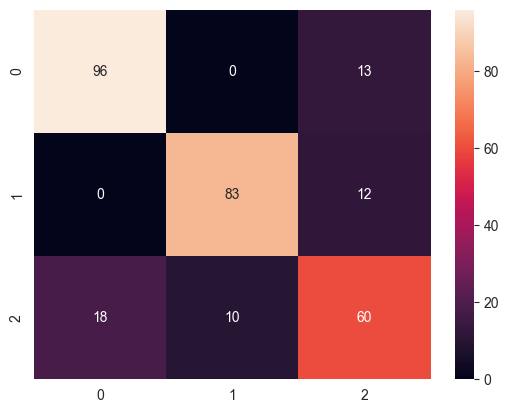

In [81]:
sns.heatmap(confusion_matrix(y_test, y_pred_linear), annot=True)

## 6.2 RBF

In [82]:
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

  Economical       0.87      0.60      0.71       109
   Expensive       0.92      0.61      0.73        95
Intermediate       0.47      0.83      0.60        88

    accuracy                           0.67       292
   macro avg       0.75      0.68      0.68       292
weighted avg       0.77      0.67      0.68       292



<Axes: >

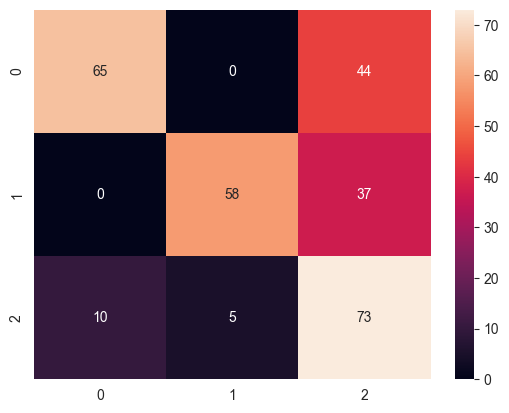

In [83]:
sns.heatmap(confusion_matrix(y_test, y_pred_rbf), annot=True)

## 6.3 Poly

In [86]:
print(classification_report(y_test, y_pred_poly))

              precision    recall  f1-score   support

  Economical       0.97      0.63      0.77       109
   Expensive       0.96      0.78      0.86        95
Intermediate       0.58      0.95      0.72        88

    accuracy                           0.78       292
   macro avg       0.84      0.79      0.78       292
weighted avg       0.85      0.78      0.78       292



<Axes: >

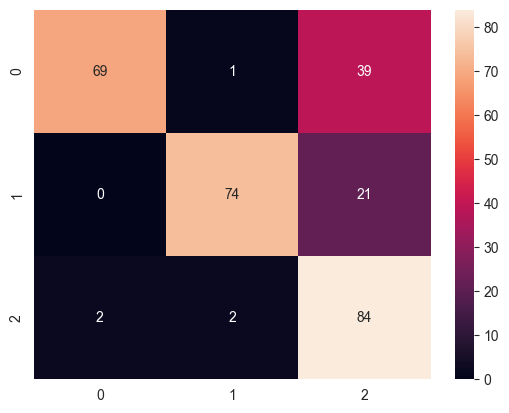

In [87]:
sns.heatmap(confusion_matrix(y_test, y_pred_poly), annot=True)